## Final Project Submission

Please fill out:
* Student name: Abdulrahman Aber, Benjamin Bai, Charles Pan, Kevin Rivera
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: David Elliott
* Blog post URL:


# Imports

In [1]:
from zipfile import ZipFile
# specifying the zip file name
file_name = "./zippedData/im.db.zip"
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
im.db                                          2021-12-20 16:31:38    169443328
Extracting all the files now...
Done!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3 as sq
conn = sq.connect('./im.db')
cur = conn.cursor()

# BOM Movie Gross DF
Columns Removed: None

In [3]:
bom_movie_gross_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
a = bom_movie_gross_df.dropna()
a

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


# IMDB DB DFS

In [5]:
imdb_schema = pd.read_sql('''SELECT * FROM sqlite_master''',conn)
imdb_schema

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [6]:
movie_basics_df = pd.read_sql('''select * from movie_ratings''', conn)
movie_basics_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
directors_df = pd.read_sql("""select * from directors""",conn)
directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [8]:
known_for_df = pd.read_sql("""select * from known_for""",conn)
known_for_df.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [9]:
movie_akas_df = pd.read_sql("""select * from movie_akas""",conn)
movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [10]:
movie_ratings_df = pd.read_sql("""select * from movie_ratings""",conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
persons_df = pd.read_sql("""select * from persons""",conn)
persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [12]:
principals_df = pd.read_sql("""select * from principals""",conn)
principals_df.head()


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [13]:
writers_df = pd.read_sql("""select * from writers""",conn)
writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


# RT Movie Info DF
Columns Removed: Synopsis, Currency, Box_Office (getting box office data elsewhere)
Note - Break genres into multiple columns or somehow else clean it or just do contains

In [14]:
rt_movie_info_df = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_movie_info_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


# RT Reviews DF
Columns Removed: Review, Critic, Top_Critic
Note - can we link this to movie names? scrape movie titles from ID?

In [15]:
rt_reviews_df = pd.read_csv('./zippedData/rt.reviews.tsv.gz', sep='\t', encoding= 'unicode_escape')
b=rt_reviews_df.dropna()
b

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
...,...,...,...,...,...,...,...,...
54419,2000,"Sleek, shallow, but frequently amusing.",2.5/4,fresh,Gene Seymour,1,Newsday,"September 27, 2002"
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,fresh,Megan Turner,1,New York Post,"September 27, 2002"
54421,2000,"Manages to be somewhat well-acted, not badly a...",1.5/4,rotten,Bob Strauss,0,Los Angeles Daily News,"September 27, 2002"
54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002"


# TMDB Movies DF
- Remove Columns: Unnamed: 0, TBD

In [21]:
tmdb_movies_df = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
c=tmdb_movies_df.dropna()
c.rename(columns={"original_title":"movie"}, inplace = True)
c.head()


,Unnamed: 0,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# TN Movie Budgets DF
Remove Columns: None

In [17]:
tn_movie_budgets_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
d=tn_movie_budgets_df.dropna()
d

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [22]:
e = d.merge(c, how='inner', on='movie')

In [36]:
e['worldwide_gross'] = e['worldwide_gross'].replace('[\$,]', '', regex=True).as(int)

SyntaxError: invalid syntax (2882243452.py, line 1)

In [32]:
e['domestic_gross'] = e['domestic_gross'].replace('[\$,]', '', regex=True)

In [34]:
e['production_budget'] = e['production_budget'].replace('[\$,]', '', regex=True)

In [38]:
e['worldwide_gross'] = e['worldwide_gross'].astype(int)

In [40]:
e['domestic_gross'] = e['domestic_gross'].astype(int)

In [41]:
e['production_budget']=e['production_budget'].astype(int)

In [42]:
e

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,6,"[28, 12, 14, 878]",19995,en,26.526,2009-12-18,Avatar,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2470,"[12, 28, 14]",1865,en,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,14169,"[28, 12, 878]",99861,en,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,23811,"[12, 28, 14]",299536,en,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,20623,"[28, 12, 14, 878]",141052,en,34.953,2017-11-17,Justice League,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,49,"Sep 1, 2015",Exeter,25000,0,489792,14678,"[53, 27]",226458,en,5.934,2015-03-26,Exeter,4.7,121
2312,51,"Apr 21, 2015",Ten,25000,0,0,12326,"[12, 27, 9648, 53]",279516,en,1.575,2014-03-28,Ten,5.4,5
2313,54,"Dec 31, 2014",Dry Spell,22000,0,0,10470,"[35, 10749]",255266,en,0.600,2013-02-14,Dry Spell,6.0,1
2314,56,"Jan 4, 2013",All Superheroes Must Die,20000,0,0,8893,"[878, 53]",86304,en,2.078,2013-01-04,All Superheroes Must Die,3.9,19


In [44]:
e["net_income"]=e['worldwide_gross']-e['production_budget']

In [48]:
e.sort_values(by='net_income',ascending=False)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count,net_income
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,6,"[28, 12, 14, 878]",19995,en,26.526,2009-12-18,Avatar,7.4,18676,2351345279
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,23811,"[12, 28, 14]",299536,en,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,1748134200
26,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,14193,"[28, 12, 878, 53]",135397,en,20.709,2015-06-12,Jurassic World,6.6,14056,1433854864
58,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,14196,"[28, 80, 53]",168259,en,20.396,2015-04-03,Furious 7,7.3,6538,1328722794
20,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,5179,"[878, 28, 12]",24428,en,50.289,2012-05-04,The Avengers,7.6,19673,1292935897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,78,"Apr 21, 2017",The Promise,90000000,8224288,10551417,20848,"[36, 10749, 18]",354859,en,10.158,2017-04-21,The Promise,7.1,195,-79448583
335,78,"Apr 21, 2017",The Promise,90000000,8224288,10551417,17560,"[36, 10749, 18]",354859,en,10.158,2017-04-21,The Promise,7.1,195,-79448583
334,78,"Apr 21, 2017",The Promise,90000000,8224288,10551417,10075,[],408852,en,0.600,2013-10-16,The Promise,9.0,1,-79448583
338,80,"Dec 13, 2017",Bright,90000000,0,0,20698,"[28, 80, 14]",400106,en,15.677,2017-12-22,Bright,6.2,3181,-90000000


In [51]:
e.drop_duplicates(subset=['movie'], inplace=True)

In [53]:
e.sort_values(by='net_income',ascending=False)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count,net_income
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,6,"[28, 12, 14, 878]",19995,en,26.526,2009-12-18,Avatar,7.4,18676,2351345279
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,23811,"[12, 28, 14]",299536,en,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,1748134200
26,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,14193,"[28, 12, 878, 53]",135397,en,20.709,2015-06-12,Jurassic World,6.6,14056,1433854864
58,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,14196,"[28, 80, 53]",168259,en,20.396,2015-04-03,Furious 7,7.3,6538,1328722794
20,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,5179,"[878, 28, 12]",24428,en,50.289,2012-05-04,The Avengers,7.6,19673,1292935897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,79,"Nov 24, 2010",The Nutcracker in 3D,90000000,195459,20466016,278,"[10402, 14, 28, 10751]",49852,en,7.566,2010-11-24,The Nutcracker in 3D,5.5,97,-69533984
382,20,"Jan 22, 2019",Renegades,77500000,0,1521672,24239,"[53, 28]",335788,fr,9.022,2018-12-21,Renegades,5.8,156,-75978328
334,78,"Apr 21, 2017",The Promise,90000000,8224288,10551417,10075,[],408852,en,0.600,2013-10-16,The Promise,9.0,1,-79448583
338,80,"Dec 13, 2017",Bright,90000000,0,0,20698,"[28, 80, 14]",400106,en,15.677,2017-12-22,Bright,6.2,3181,-90000000


In [58]:
e_sort_votes = e[e['vote_average']>6]

In [62]:
e["ROI"]=((e['net_income'])/(e['production_budget']))*100

In [79]:
e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 0 to 2315
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_x               1908 non-null   int64         
 1   release_date_x     1908 non-null   object        
 2   movie              1908 non-null   object        
 3   production_budget  1908 non-null   int64         
 4   domestic_gross     1908 non-null   int64         
 5   worldwide_gross    1908 non-null   int64         
 6   Unnamed: 0         1908 non-null   int64         
 7   genre_ids          1908 non-null   object        
 8   id_y               1908 non-null   int64         
 9   original_language  1908 non-null   object        
 10  popularity         1908 non-null   float64       
 11  release_date_y     1908 non-null   datetime64[ns]
 12  title              1908 non-null   object        
 13  vote_average       1908 non-null   float64       
 14  vote_cou

In [64]:
e['year']=e['release_date_y'][:3]

In [77]:
from datetime import datetime 
e["release_date_y"] = pd.to_datetime(e["release_date_y"])


In [81]:
del e['year']

In [88]:
e.sort_values(by='release_date_y', ascending=False)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count,net_income,ROI
1611,16,"May 3, 2019",El Chicano,8000000,700261,700261,24691,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,-7299739,-91.246737
2048,48,"Feb 1, 2019",Braid,1660000,0,80745,24598,"[53, 18, 27]",510284,en,5.972,2019-02-01,Braid,6.4,18,-1579255,-95.135843
729,85,"Jan 11, 2019",The Upside,37500000,108235497,119024536,20633,"[35, 18]",440472,en,28.138,2019-01-11,The Upside,7.3,274,81524536,217.398763
645,58,"Dec 25, 2018",Holmes & Watson,42000000,30568743,41926605,23910,"[9648, 12, 35, 80]",426563,en,19.331,2018-12-25,Holmes & Watson,4.1,217,-73395,-0.174750
1137,81,"Dec 25, 2018",On the Basis of Sex,20000000,24622687,38073377,23833,"[18, 36]",339380,en,32.624,2018-12-25,On the Basis of Sex,7.4,225,18073377,90.366885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,90,"Nov 16, 1977",Close Encounters of the Third Kind,20000000,169100479,340800479,20745,"[878, 18]",840,en,13.044,1977-11-16,Close Encounters of the Third Kind,7.3,2005,320800479,1604.002395
867,26,"Oct 18, 2013",Carrie,30000000,35266619,82409520,154,"[27, 53]",7340,en,9.467,1976-11-03,Carrie,7.1,1766,52409520,174.698400
2219,20,"Mar 31, 2015",Viskningar och rop,400000,0,9071,24299,[18],10238,sv,8.239,1972-12-21,Cries and Whispers,8.0,233,-390929,-97.732250
1452,27,"Apr 2, 1968",2001: A Space Odyssey,10500000,59936321,71928046,23872,"[878, 9648, 12]",62,en,23.781,1968-04-10,2001: A Space Odyssey,8.0,5837,61428046,585.029010


In [90]:
e['year'] = pd.DatetimeIndex(e['release_date_y']).year
e['month'] = pd.DatetimeIndex(e['release_date_y']).month

In [183]:
e_modern = e[e['year']>2000]

In [170]:
e_modern.sort_values(by='ROI', ascending=False)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count,net_income,ROI,year,month
2276,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,14362,"[27, 53]",299245,en,9.166,2015-07-10,The Gallows,4.8,591,41556474,41556.474000,2015,7
2107,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,5444,"[53, 27]",76487,en,7.403,2012-01-06,The Devil Inside,4.7,441,100759490,10075.949000,2012,1
2231,69,"May 1, 1981",Graduation Day,250000,23894000,23894000,17086,[],450254,en,0.600,2015-01-01,Graduation Day,5.0,1,23644000,9457.600000,2015,1
2088,57,"Oct 29, 2004",Saw,1200000,55968727,103880027,11055,"[27, 9648, 80]",176,en,19.127,2004-10-29,Saw,7.4,4795,102680027,8556.668917,2004,10
2052,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,2498,"[27, 53]",49018,en,16.197,2011-04-01,Insidious,6.9,3582,98370886,6558.059067,2011,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,28,"Mar 6, 2012",High Road,546173,0,0,5793,[35],89857,en,3.380,2012-03-06,High Road,5.6,38,-546173,-100.000000,2012,3
1799,15,"Mar 10, 2015",Treading Water,4700000,0,0,15625,"[18, 35]",166624,en,1.390,2015-03-13,Treading Water,6.2,7,-4700000,-100.000000,2015,3
1798,14,"Dec 31, 2011",Without Men,4700000,0,0,3355,"[35, 10749]",68202,en,2.312,2011-06-29,Without Men,4.5,13,-4700000,-100.000000,2011,6
1553,45,"Apr 13, 2012",Detention,10000000,0,0,748,"[27, 28, 35, 53]",108993,en,2.377,2010-01-16,Detention,3.5,15,-10000000,-100.000000,2010,1


In [101]:
e_modern_2000 = e_modern[e_modern['ROI']]

In [103]:
e_modern_2000.sort_values(by="ROI", ascending=False)

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count,net_income,ROI,year,month
2276,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,14362,"[27, 53]",299245,en,9.166,2015-07-10,The Gallows,4.8,591,41556474,41556.474000,2015,7
2107,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,5444,"[53, 27]",76487,en,7.403,2012-01-06,The Devil Inside,4.7,441,100759490,10075.949000,2012,1
2231,69,"May 1, 1981",Graduation Day,250000,23894000,23894000,17086,[],450254,en,0.600,2015-01-01,Graduation Day,5.0,1,23644000,9457.600000,2015,1
2088,57,"Oct 29, 2004",Saw,1200000,55968727,103880027,11055,"[27, 9648, 80]",176,en,19.127,2004-10-29,Saw,7.4,4795,102680027,8556.668917,2004,10
2052,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,2498,"[27, 53]",49018,en,16.197,2011-04-01,Insidious,6.9,3582,98370886,6558.059067,2011,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,25,"Jan 14, 2011",The Dilemma,70000000,48475290,70546865,2652,"[35, 18]",44564,en,9.518,2011-01-13,The Dilemma,5.3,448,546865,0.781236,2011,1
2004,60,"Apr 7, 2015",Lost River,2000000,45431,2009644,14535,"[14, 53, 18]",167810,en,7.029,2015-04-10,Lost River,5.8,352,9644,0.482200,2015,4
1453,33,"Feb 18, 1983",Lovesick,10100000,10143618,10143618,11657,"[10749, 35]",319389,en,4.775,2014-04-24,Lovesick,5.0,44,43618,0.431861,2014,4
1422,29,"Mar 1, 2013",Stoker,12000000,1703125,12034913,7999,"[18, 27, 53]",86825,en,10.738,2013-03-01,Stoker,6.6,1282,34913,0.290942,2013,3


In [146]:
e_modern_2000_month_1 = e['month'].value_counts('ROI')
sorted_data = e_modern_2000_month_1
# a=list(sorted_data.values)
# len(a)
sorted_data

10    0.110063
12    0.092767
3     0.091719
9     0.089623
11    0.084382
8     0.083857
4     0.082809
6     0.081237
7     0.075996
1     0.074423
5     0.067610
2     0.065514
Name: month, dtype: float64

In [173]:
month_average_roi = []

month_1 = e_modern[e_modern['month']==1]
month_average_roi.append(month_1['ROI'].mean())
month_2 = e_modern[e_modern['month']==2]
month_average_roi.append(month_2['ROI'].mean())
month_3 = e_modern[e_modern['month']==3]
month_average_roi.append(month_3['ROI'].mean())
month_4 = e_modern[e_modern['month']==4]
month_average_roi.append(month_4['ROI'].mean())
month_5 = e_modern[e_modern['month']==5]
month_average_roi.append(month_5['ROI'].mean())
month_6 = e_modern[e_modern['month']==6]
month_average_roi.append(month_6['ROI'].mean())
month_7 = e_modern[e_modern['month']==7]
month_average_roi.append(month_7['ROI'].mean())
month_8 = e_modern[e_modern['month']==8]
month_average_roi.append(month_8['ROI'].mean())
month_9 = e_modern[e_modern['month']==9]
month_average_roi.append(month_9['ROI'].mean())
month_10 = e_modern[e_modern['month']==10]
month_average_roi.append(month_10['ROI'].mean())
month_11 = e_modern[e_modern['month']==11]
month_average_roi.append(month_11['ROI'].mean())
month_12 = e_modern[e_modern['month']==12]
month_average_roi.append(month_12['ROI'].mean())

month_average_roi


[304.193658687216,
 233.10685128061235,
 121.03186563956942,
 216.02595809428914,
 315.1422875052094,
 234.55796169944364,
 606.26717303053,
 208.23233664181208,
 138.38589153592073,
 296.78045099586836,
 213.67215815098018,
 185.6033576843944]

''

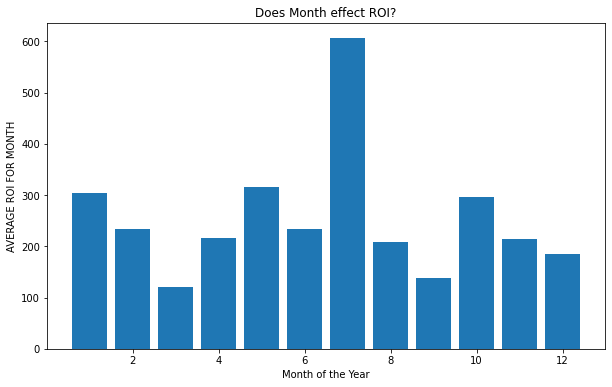

In [174]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = month_average_roi

ax1.scatter(x,y)
ax1.set_xlabel('Month of the Year')
ax1.set_ylabel('AVERAGE ROI FOR MONTH')
ax1.set_title('Does Month effect ROI?')
;



In [176]:
month_median_roi = []

month_1 = e_modern[e_modern['month']==1]
month_median_roi.append(month_1['ROI'].median())
month_2 = e_modern[e_modern['month']==2]
month_median_roi.append(month_2['ROI'].median())
month_3 = e_modern[e_modern['month']==3]
month_median_roi.append(month_3['ROI'].median())
month_4 = e_modern[e_modern['month']==4]
month_median_roi.append(month_4['ROI'].median())
month_5 = e_modern[e_modern['month']==5]
month_median_roi.append(month_5['ROI'].median())
month_6 = e_modern[e_modern['month']==6]
month_median_roi.append(month_6['ROI'].median())
month_7 = e_modern[e_modern['month']==7]
month_median_roi.append(month_7['ROI'].median())
month_8 = e_modern[e_modern['month']==8]
month_median_roi.append(month_8['ROI'].median())
month_9 = e_modern[e_modern['month']==9]
month_median_roi.append(month_9['ROI'].median())
month_10 = e_modern[e_modern['month']==10]
month_median_roi.append(month_10['ROI'].median())
month_11 = e_modern[e_modern['month']==11]
month_median_roi.append(month_11['ROI'].median())
month_12 = e_modern[e_modern['month']==12]
month_median_roi.append(month_12['ROI'].median())

month_median_roi

[64.83121976190476,
 67.78308466666667,
 33.923288,
 37.970974444444444,
 85.95461714285715,
 104.83045,
 143.2924272,
 76.33422133333335,
 36.1828,
 17.52387,
 124.87727794871795,
 102.95524]

''

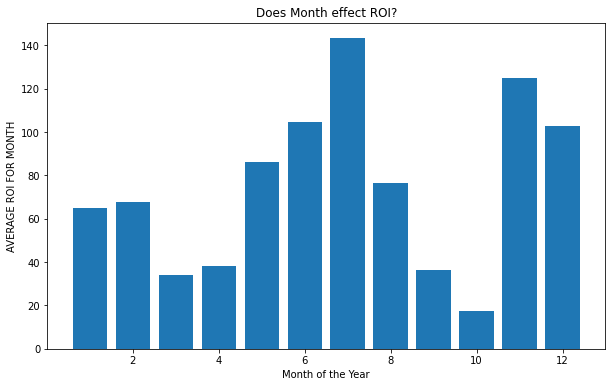

In [178]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = month_median_roi

ax1.bar(x,y)
ax1.set_xlabel('Month of the Year')
ax1.set_ylabel('AVERAGE ROI FOR MONTH')
ax1.set_title('Does Month effect ROI?')
;


In [ ]:
month_median_roi = []

month_1 = e_modern[e_modern['month']==1]
month_median_roi.append(month_1['ROI'].median())
month_2 = e_modern[e_modern['month']==2]
month_median_roi.append(month_2['ROI'].median())
month_3 = e_modern[e_modern['month']==3]
month_median_roi.append(month_3['ROI'].median())
month_4 = e_modern[e_modern['month']==4]
month_median_roi.append(month_4['ROI'].median())
month_5 = e_modern[e_modern['month']==5]
month_median_roi.append(month_5['ROI'].median())
month_6 = e_modern[e_modern['month']==6]
month_median_roi.append(month_6['ROI'].median())
month_7 = e_modern[e_modern['month']==7]
month_median_roi.append(month_7['ROI'].median())
month_8 = e_modern[e_modern['month']==8]
month_median_roi.append(month_8['ROI'].median())
month_9 = e_modern[e_modern['month']==9]
month_median_roi.append(month_9['ROI'].median())
month_10 = e_modern[e_modern['month']==10]
month_median_roi.append(month_10['ROI'].median())
month_11 = e_modern[e_modern['month']==11]
month_median_roi.append(month_11['ROI'].median())
month_12 = e_modern[e_modern['month']==12]
month_median_roi.append(month_12['ROI'].median())

month_median_roi

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = month_median_roi

ax1.bar(x,y)
ax1.set_xlabel('Month of the Year')
ax1.set_ylabel('AVERAGE ROI FOR MONTH')
ax1.set_title('Does Month effect ROI?')
;


In [182]:
import numpy as np

y = month_median_roi
x= [1,2,3,4,5,6,7,8,9,10,11,12]

np.corrcoef(x, y, rowvar=True)

array([[1.        , 0.26291301],
       [0.26291301, 1.        ]])

In [185]:

e_modern.corrwith(method='pearson', min_periods=1)[source]

TypeError: 'DataFrame' object is not callable